In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
n_samples=1000
n_features=5
np.random.seed(42)
X=np.random.normal(loc=0,scale=1,size=(n_samples,n_features))

In [91]:
indices=np.random.choice(n_samples,size=20,replace=False)

In [92]:
##noise in 0th variable
X[indices, 0] = np.random.normal(loc=10, scale=2, size=len(indices))
labels = np.zeros(n_samples)
labels[indices] = -1
labels[labels == 0] = 1

In [93]:
df=pd.DataFrame(X)

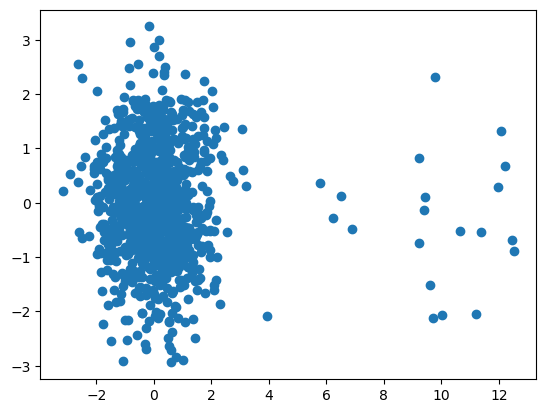

In [94]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])

## Implementation of Isolation forest to detect anomalies

In [95]:
from sklearn.ensemble import IsolationForest

In [96]:
clf=IsolationForest()
clf.fit(df)
predictions=clf.predict(df)

In [97]:
index=np.where(predictions<0)
x=df.values

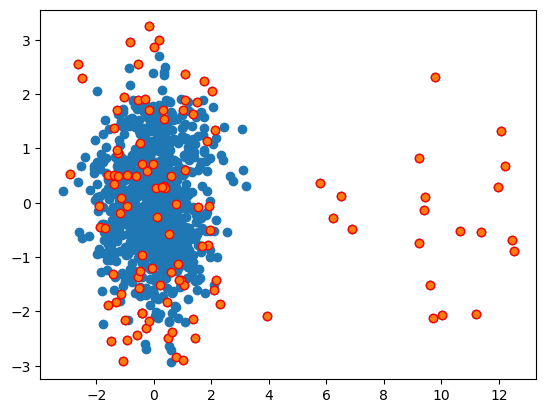

In [98]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.scatter(x[index,0],x[index,1],edgecolors="r")

In [99]:
from sklearn.metrics import accuracy_score

# Compare labels and predictions
accuracy = accuracy_score(labels, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.908


## The accuracy is 90.8%

In [100]:
n_samples=1000
n_features=5
np.random.seed(42)
X=np.random.normal(loc=0,scale=1,size=(n_samples,n_features))
indices_0=np.random.choice(n_samples,size=20,replace=False)


### noise in both zero and one

X[indices_0, 0] = np.random.normal(loc=10, scale=2, size=len(indices))
labels = np.zeros(n_samples)
labels[indices_0] = -1

indices_1=np.random.choice(n_samples,size=20,replace=False)
X[indices_1, 1] = np.random.normal(loc=10, scale=4, size=len(indices))
labels[indices_1]=-1
labels[labels == 0] = 1

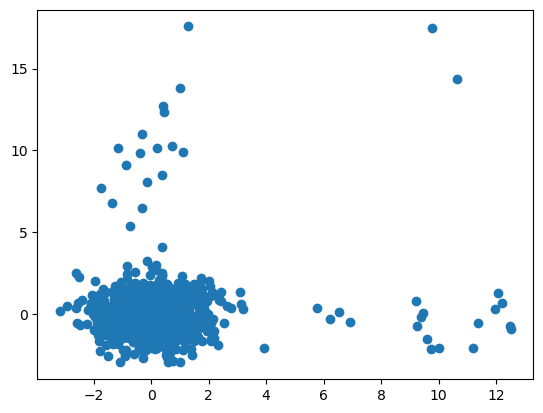

In [101]:
df=pd.DataFrame(X)
plt.scatter(df.iloc[:,0],df.iloc[:,1])

In [102]:
indices_1

array([255, 647, 533, 792, 766, 874, 689, 779, 756, 980, 254,  33, 205,
        34, 366, 516, 451, 161, 619, 696])

## Implementation of Isolation forest to detect anomalies

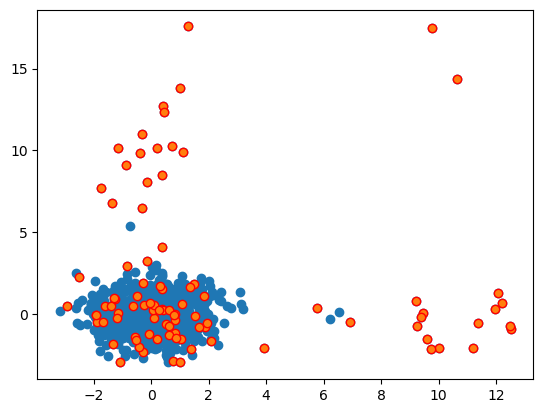

In [103]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(contamination="auto")
clf.fit(df)
predictions=clf.predict(df)
index=np.where(predictions<0)
x=df.values
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.scatter(x[index,0],x[index,1],edgecolors="r")

In [104]:
from sklearn.metrics import accuracy_score

# Compare labels and predictions
accuracy = accuracy_score(labels, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.939


## The accuracy is 93.9%